# Avacado Project

# Problem Statement:
Avocado is a fruit consumed by people heavily in the United States.

Content -

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

* Date - The date of the observation
* Average Price - The average price of a single avocado
* Type - Whether it is conventional or organic
* Year - The year information
* Region - The city or region of the observation
* Total Volume - Total number of avocados sold
* 4046 - Total number of avocados with PLU 4046 sold
* 4225 - Total number of avocados with PLU 4225 sold
* 4770 - Total number of avocados with PLU 4770 sold

# Inspiration /Label

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file.

To download the dataset, use the link given below.

Downlaod Files:</b> https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/avocado.csv.zip

# * Importing require library for performing EDA, Data Wrangling and data cleaning

In [1]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Avocado Csv file using pandas
# Downloaded the Zip file and then extracted the CSV file on my local computer after which I imported the entire dataset on this Jupyter Notebook with the help of pandas.


df=pd.read_csv('avocado.csv')

In [3]:
print('No of Rows:',df.shape[0])
print('No of Columns:',df.shape[1])
df.head()

No of Rows: 18249
No of Columns: 14


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


* Checking the contents of our dataset where it shows that we have 18249 rows and 14 columns. However the first column named "Unnamed" is completely useless and needs to be deleted.

Now as per our given problem statement we see that Avergae Price is the column which needs to be predicted making it our label. Since the data present in our label is in continous format this turns out to be a Regression problem!

Also the feature columns that we have are not all in numerical format and while building our machine learning model object datatypes are not acceptable.

In [4]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

Here we are taking a look at all the columns that are present in our dataset starting from Date - The date of the observation, Average Price - The average price of a single avocado, Total Volume - Total number of avocados sold, 4046 - Total number of avocados with PLU 4046 sold, 4225 - Total number of avocados with PLU 4225 sold, 4770 - Total number of avocados with PLU 4770 sold, Total Bags - Total number of bags that were given out, Small Bags - Total number of small bags that were given out, Large Bags - Total number of large bags that were given out, XLarge Bags - Total number of extra large bags that were given out, Type - Whether it is conventional or organic, Year - The year information and Region - The city or region of the observation.

We may need to separate or bifurcate few columns depending on it's possibilities and rename them accordingly too.

In [5]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

I have removed the "Unnamed" column from our dataset now.

In [6]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [7]:
df.shape

(18249, 13)

Here we see that the shape of our dataset has changed to 18249 rows and 13 columns.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


The info method provides us insights such as the data type of our columns and whether we have any null values present in our dataset or not. It looks like we do not have any null values but we saw "0.0" values present in the columns so we may have to either keep it the same way, treat it by using mean/mode option or delete it completely.

There are 9 columns in our dataset with float values, 1 column with integer value and 3 columns with object data type.

In [9]:
df.isna().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

I was simply cross verifying for null values and luckily we do not have any missing data that needs to be treated.

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65
year,18249.0,2016.147899,9.399385e-01,2015.00,2015.00,2016.00,2017.00,2018.00


Uisng the describe method in transpose format we are able to see information about numerical columns since onject data types are ignored in this function. The count columns again confirms of our dataset having no missing values.

We do have zero values present in columns 4046, 4225, 4770, Total Bags, Small Bags, Large Bags and XLarge Bags but they seem to be valid since there is a possibility of presence of a legitimate zero value.

In [11]:
df.nunique()

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

All the unique values present in each column are segregated and listed here. This gives us an insight on how many categorical options like type and year are present and how many simply have continous data present in them.



In [12]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

The acceptable range for skewness is between +/-0.5. And we see almost all feature columns with skewness for now. Once we have processed the data further we may check for the skewness details again and if it still persists then we will need to treat it accordingly.

In [13]:
df['Year'], df['Month'], df['Day'] = df['Date'].str.split('-').str
df.drop(columns=['Date','year'], inplace=True)
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12,06
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,2018,02,04
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,2018,01,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,2018,01,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,2018,01,14


I have separated the Date column into 3 columns namely the Year, Month and Day option so that we can remove Date the object datatype column and year that is already present in Date so we are avoiding duplicate columns.

In [14]:
df['Year']=df['Year'].astype(int)
df['Month']=df['Month'].astype(int)
df['Date']=df['Day'].astype(int)
df.drop(columns=['Day'], inplace=True)
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Date
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,2018,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,2018,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,2018,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,2018,1,14


Since we separated the Date column that was originally an object datatype the new columns generated were also object datatype even though they were holding integer values therefore we changed the datatype and I changed the Day back to Date then got rid of the duplicate column again.

# Statistical Analysis

Before Going for Statistical exploration of data, first check integrity of data & Missing value

# Data Integrity Check
Since dataset is large, Let check for any entry which is repeated or duplicated in dataset at same date.

In [15]:
df.duplicated().sum()  # This will check the duplicate data for all columns.

0

# Comment:
Dataset doesnot contain Any duplicate entry. So Yes To Go !!!

# Missing value check

<AxesSubplot:>

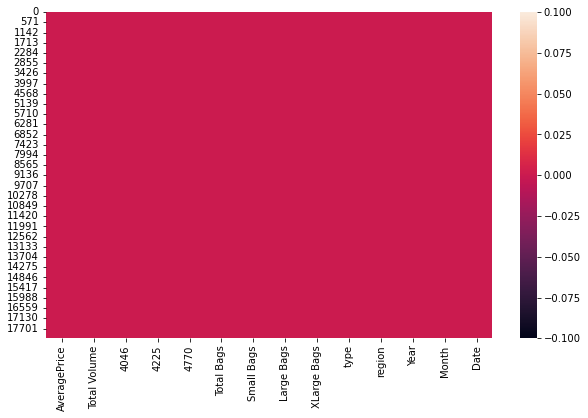

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())

In [17]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

              Missing Values  % Missing data
AveragePrice               0             0.0
Total Volume               0             0.0
4046                       0             0.0
4225                       0             0.0
4770                       0             0.0
Total Bags                 0             0.0
Small Bags                 0             0.0
Large Bags                 0             0.0
XLarge Bags                0             0.0
type                       0             0.0
region                     0             0.0
Year                       0             0.0
Month                      0             0.0
Date                       0             0.0


# Comment:
There is no missing values in dataset.

In [18]:
# Converting datatype of date column
df['Date']=pd.to_datetime(df.Date)

In [19]:
df['Date'].dtype

dtype('<M8[ns]')

# Statistical Matrix

<AxesSubplot:>

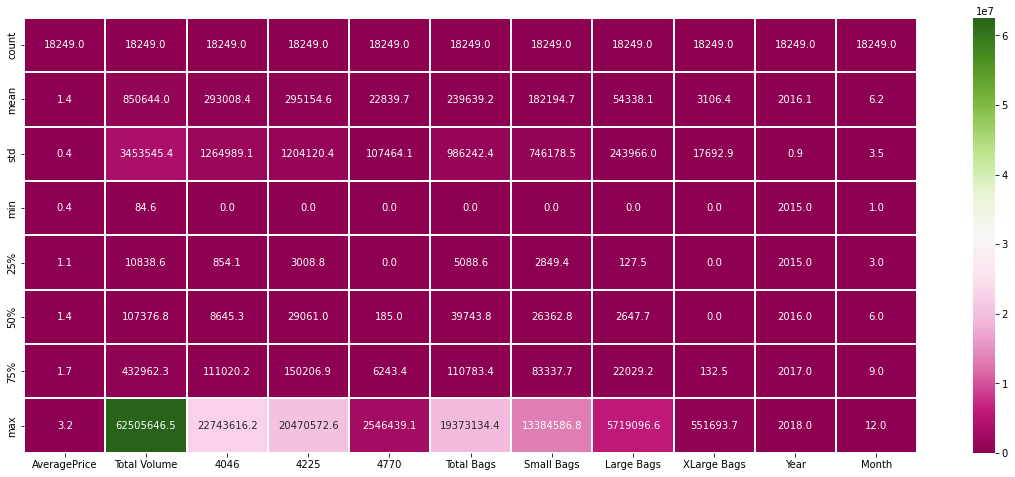

In [20]:
# Visualizing the statistics of the columns using heatmap.
plt.figure(figsize=(20,8))
sns.heatmap(df.describe(),linewidths = 0.1,fmt='0.1f',annot = True,cmap='PiYG')

In [21]:
df.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
AveragePrice,18249.0,1.406,0.403,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013,3453545.355,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.425,1264989.082,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568,1204120.401,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.736,107464.068,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202,986242.399,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.687,746178.515,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088,243965.965,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.427,17692.895,0.00,0.00,0.00,132.50,551693.65
Year,18249.0,2016.148,0.940,2015.00,2015.00,2016.00,2017.00,2018.00


# Comment :
* We can easily suspect that some of the features contain outliers after looking at 50% and max columns.
* For most of columns have minimum value of zero.
* Almost in all columns value of mean is greater than median. Data is right skewed.
* For most of columns value of std. deviation is greater than mean i.e. data is spread.

# Lets do some Statistical Analysis. Start with find Average price of avocodo over the timeframe and according types

In [22]:
print("\033[1m"+'Minimum Price of Avocado :'+"\033[0m",df.AveragePrice.min(),'USD')
print("\033[1m"+'Maximum Price of avacado :'+"\033[0m",df.AveragePrice.max(),'USD')
print("\033[1m"+'Average Price of avacado :'+"\033[0m",df.AveragePrice.mean(),'USD')

Minimum Price of Avocado : 0.44 USD
Maximum Price of avacado : 3.25 USD
Average Price of avacado : 1.4059784097758825 USD


Avacado varies from 0.44 USD To 3.25 USD with average price of 1.40 USD per unit

<AxesSubplot:title={'center':'Distribution Price'}, xlabel='AveragePrice', ylabel='Density'>

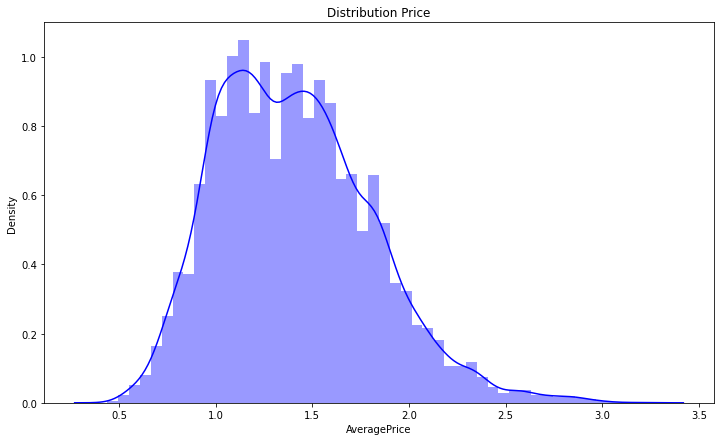

In [23]:
plt.figure(figsize=(12,7))
plt.title('Distribution Price')
sns.distplot(df["AveragePrice"], color='b')

# * Most of cases Average price of Avacado varies between 1.1 and 1.6 USD/unit

In [24]:
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [25]:
df.groupby('type')['AveragePrice'].mean()

type
conventional    1.158040
organic         1.653999
Name: AveragePrice, dtype: float64

In [26]:
print("\033[1m"+'Percentage difference in price of avacado :'+"\033[0m",((1.65399-1.1580)/1.1580)*100,"%")

Percentage difference in price of avacado : 42.831606217616596 %


<AxesSubplot:xlabel='AveragePrice', ylabel='type'>

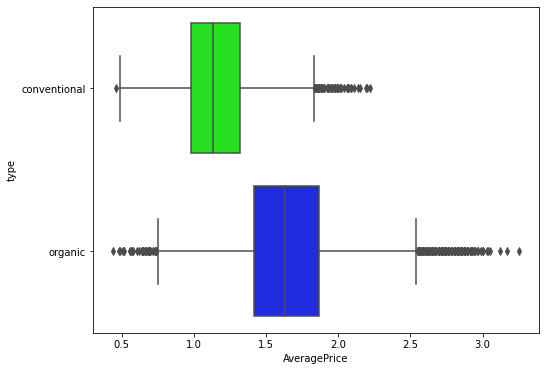

In [27]:
plt.figure(figsize=(8,6))
sns.boxplot(y="type", x="AveragePrice", data=df, palette = 'hsv')

# Comment :
* Oraganic Avocado is almost 43% more costlier than conventional Avacado.
* We can see that Average Price of Organic Avocado is higher than Conventional Avocado.
* This obvious as cultivation of organic avocado is expensive, time taking process demanding much effort & patience.Also health cautious and quality oriented people are willing to pay more price for it.

Before going deeper with Average price to gain more insight as it has lot more to explore, just let do quick check over volumetric sell of Avacado. Normal tendency of most people is they dont want to pay more price so most probably if such scenerio exist then it will be reflected in total sales.

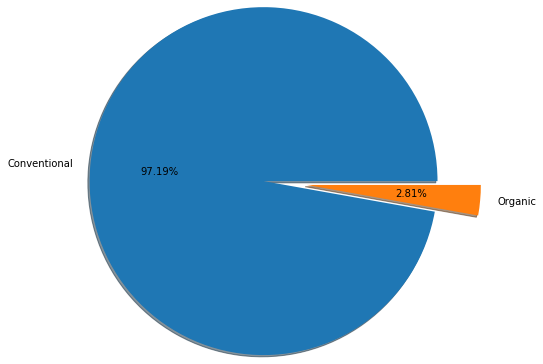

In [28]:
labels = 'Conventional','Organic',
fig, ax = plt.subplots()
ax.pie(df.groupby('type')['Total Volume'].mean(),labels = labels,radius =2,autopct = '%2.2f%%',explode=[0.3,0.2], shadow=True,)
plt.show()

In [29]:
df.groupby('type')['Total Volume'].mean()

type
conventional    1.653213e+06
organic         4.781121e+04
Name: Total Volume, dtype: float64

# Visualization

# Univariate Analysis

conventional    9126
organic         9123
Name: type, dtype: int64


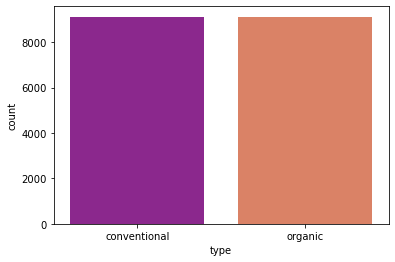

In [30]:
print(df['type'].value_counts())
sns.countplot(x='type', data=df, palette="plasma")
plt.show()

In the "type" column we have data points for conventional and organic avacados.

2017    5722
2016    5616
2015    5615
2018    1296
Name: Year, dtype: int64


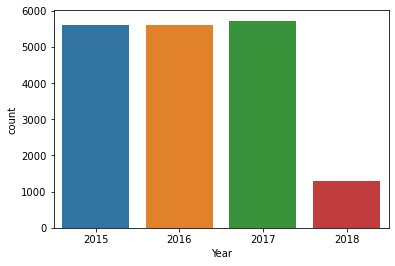

In [31]:
print(df['Year'].value_counts())
sns.countplot(x='Year', data=df)
plt.show()

In the "Year" column we see the the datapoints are very less for 2018 compared to the one's in 2015, 2016 and 2017.

1     1944
3     1836
2     1728
10    1512
7     1512
5     1512
11    1404
8     1404
4     1404
12    1403
9     1296
6     1294
Name: Month, dtype: int64


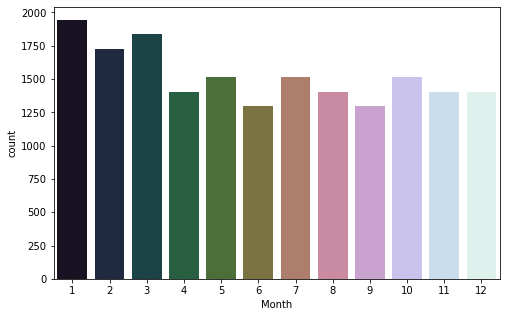

In [32]:
print(df['Month'].value_counts())
plt.figure(figsize=(8,5))
sns.countplot(x='Month', data=df, palette="cubehelix")
plt.show()

In the "Month" column we can see the least datapoints in the month of June that is number 6 and the highest value concentration is present in the month of January that is number 1.

1970-01-01 00:00:00.000000004    756
1970-01-01 00:00:00.000000011    756
1970-01-01 00:00:00.000000018    755
1970-01-01 00:00:00.000000025    755
1970-01-01 00:00:00.000000001    648
1970-01-01 00:00:00.000000026    648
1970-01-01 00:00:00.000000005    648
1970-01-01 00:00:00.000000012    648
1970-01-01 00:00:00.000000003    648
1970-01-01 00:00:00.000000008    648
1970-01-01 00:00:00.000000015    648
1970-01-01 00:00:00.000000022    648
1970-01-01 00:00:00.000000024    648
1970-01-01 00:00:00.000000017    648
1970-01-01 00:00:00.000000010    648
1970-01-01 00:00:00.000000019    648
1970-01-01 00:00:00.000000007    540
1970-01-01 00:00:00.000000014    540
1970-01-01 00:00:00.000000021    540
1970-01-01 00:00:00.000000028    540
1970-01-01 00:00:00.000000027    540
1970-01-01 00:00:00.000000020    540
1970-01-01 00:00:00.000000029    540
1970-01-01 00:00:00.000000013    540
1970-01-01 00:00:00.000000006    539
1970-01-01 00:00:00.000000002    432
1970-01-01 00:00:00.000000009    432
1

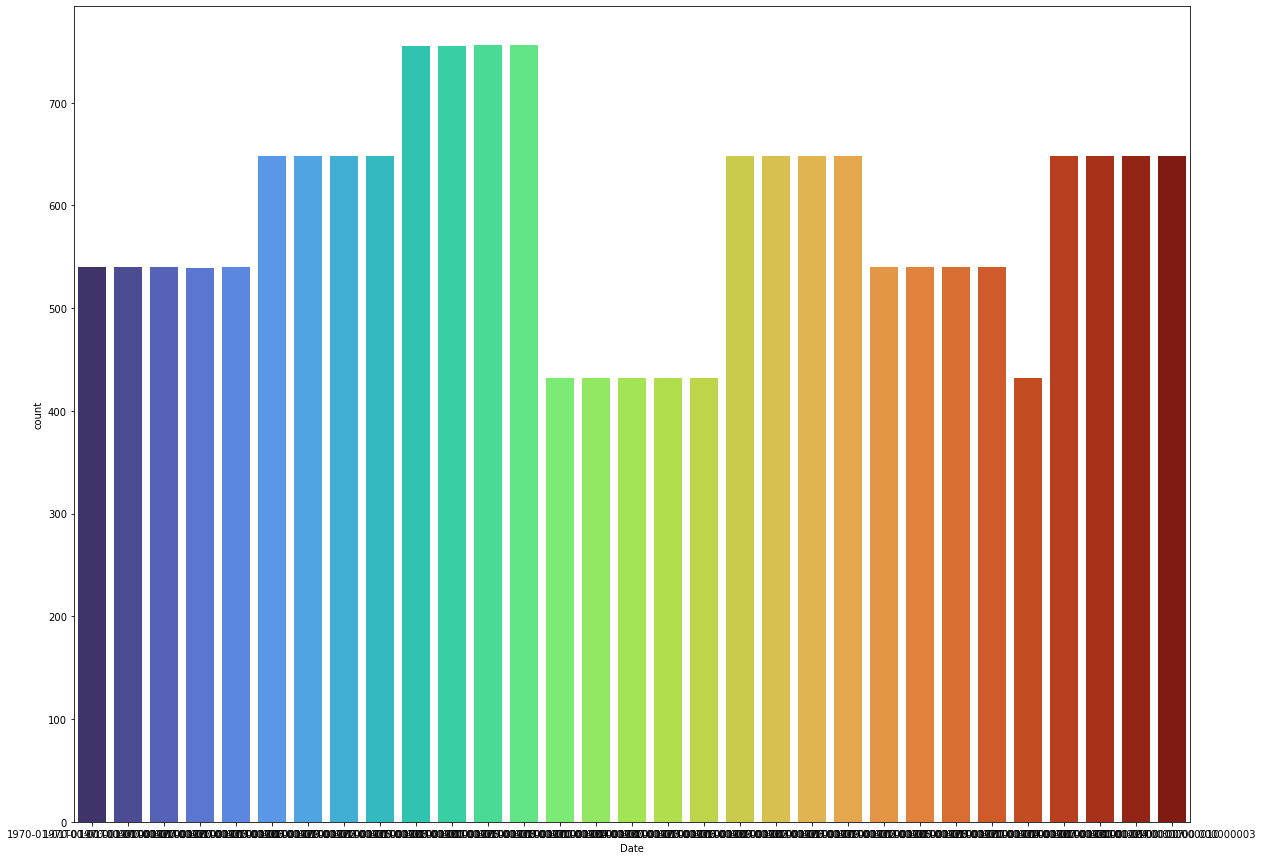

In [33]:
print(df['Date'].value_counts())
plt.figure(figsize=(20,15))
sns.countplot(x='Date', data=df, palette="turbo")
plt.show()

In the "Date" column we can see multiple date with highest and lowest datapoint concentration. Like in the highest values we have dates 11 and 4 while for lowest values we have dates 30, 16, 9, 23, 2 and 31.

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

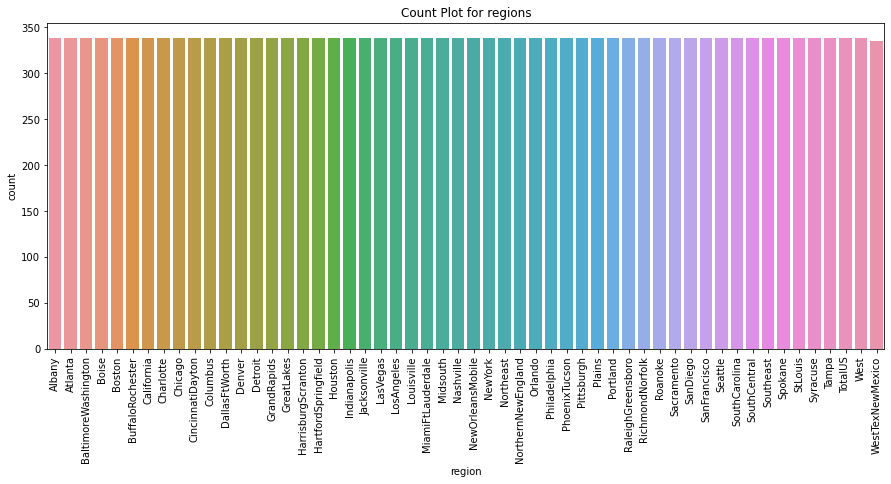

In [34]:
print(df['region'].value_counts())
plt.figure(figsize=(15,6))
sns.countplot(df['region'], data=df)
plt.title(f'Count Plot for regions')
plt.xticks(rotation=90)
plt.show()

In the "region" column we can see that the data points for almost all the values are same except WestTexNewMexico region which is a bit less than the others present in the column.

# * Bivariate analysis

<Figure size 1080x720 with 0 Axes>

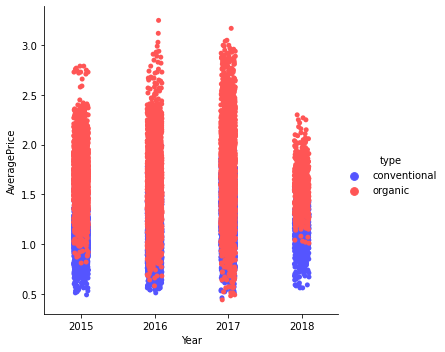

In [35]:
plt.figure(figsize=(15,10))
sns.catplot(x="Year", y="AveragePrice", hue="type", data=df, palette="seismic")
plt.show()

In the above categorical plot we see the Average Price information as per year and how conventional and organic types were sold. We can see that organic types are always priced higher than the conventional one's since organic farming requires lots of efforts, time and method to grow avacados that yield lesser when compared to conventional ways by using chemical fertilizers.

<Figure size 1080x720 with 0 Axes>

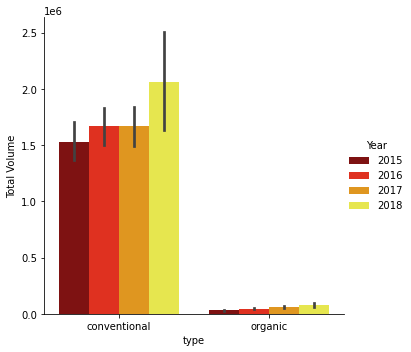

In [36]:
plt.figure(figsize=(15,10))
sns.catplot(x="type", y="Total Volume", hue="Year", kind="bar", data=df, palette="hot")
plt.show()

In the above bar plot we see that the Total Volume for conventional type were high in all 4 years when compared to it's organic counterparts.

<Figure size 1080x720 with 0 Axes>

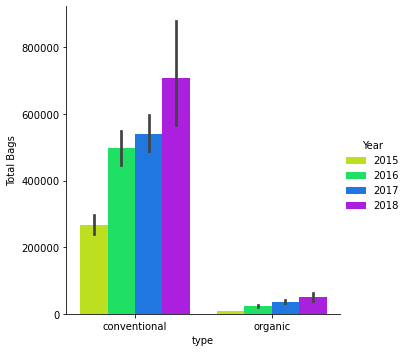

In [37]:
plt.figure(figsize=(15,10))
sns.catplot(x="type", y="Total Bags", hue="Year", data=df, kind="bar", palette="hsv")
plt.show()

In the above bar plot we see that since the Total Volume was always high for conventional types being sold therefore the usage of bags was higher for conventional types over the organic ones. Therefore we see that Total Bags is high adn specially highest in 2018 for conventional avacados just like the Total Volume that was sold being directly proportional with each other.

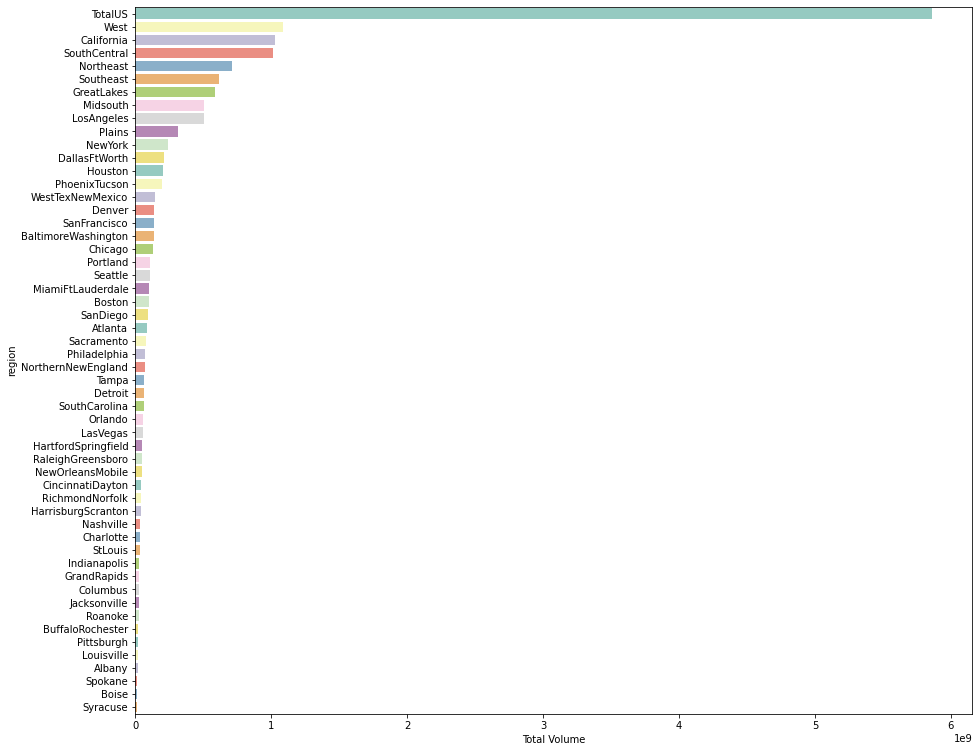

In [38]:
region = df.groupby('region')['Total Volume'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(15,13))
sns.barplot(x=region["Total Volume"], y=region["region"], data=df, palette="Set3")
plt.show()

In the above bar plot we can see a sorted number of Total Volume of avacados sold from each and every region. Therefore when compared to the Total US area per region values are lesser but we can see tha major contributors in region are West, California, South Central, North East, South East, Great Lakes, Mid South, Los Angeles, Plains, New York and so forth.

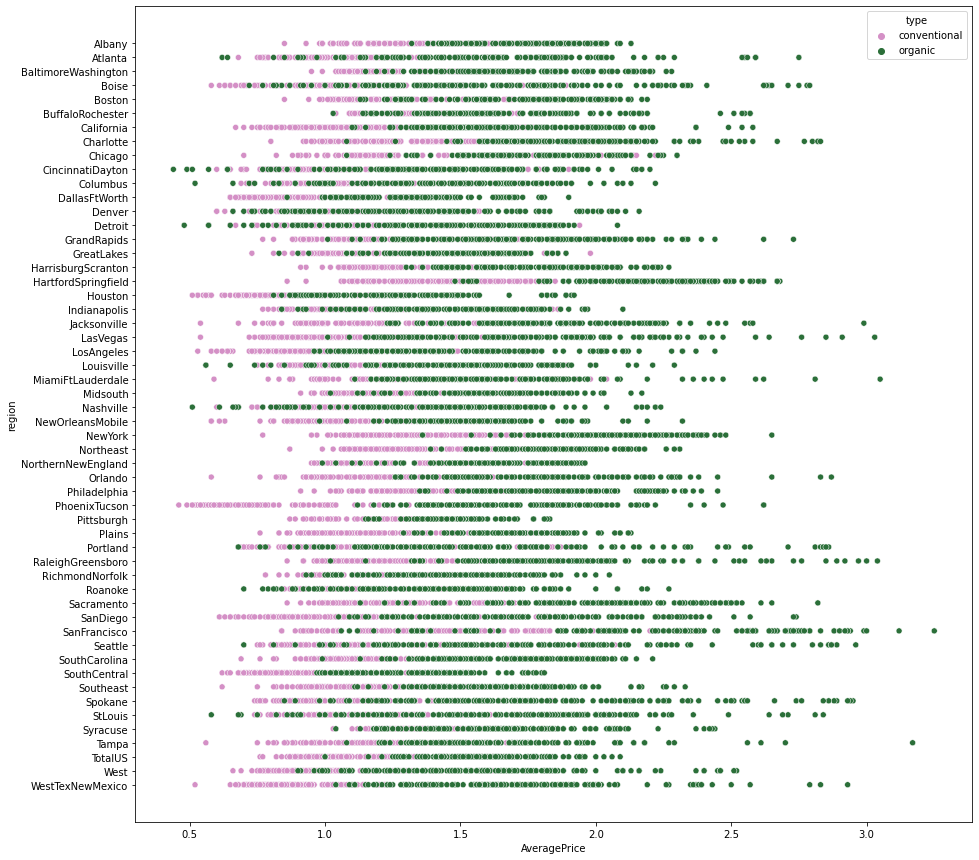

In [39]:
plt.figure(figsize=(15,15))
sns.scatterplot(x='AveragePrice', y='region', hue='type', data=df, palette="cubehelix_r")
plt.show()

In the above scatter plot that holds data between Region vs Average Price we can see clearly how organic avacados are priced way higher than it's conventional counterparts in each and every region.

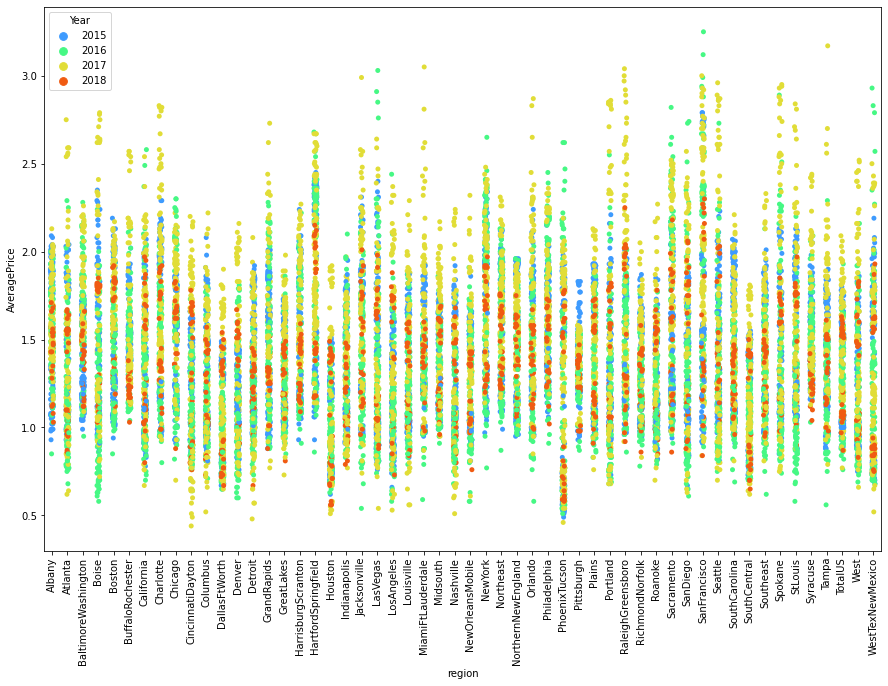

In [40]:
plt.figure(figsize=(15,10))
sns.stripplot(x='region', y='AveragePrice', hue="Year", data=df, palette="turbo")
plt.xticks(rotation=90)
plt.show()

In the above strip plot we see the Average Price of avacodos over all the regions in all 4 years. We can see that in years 2016 and 2017 the average prices were way higher than in the years 2015 and 2018.

# * Multivariate Analysis

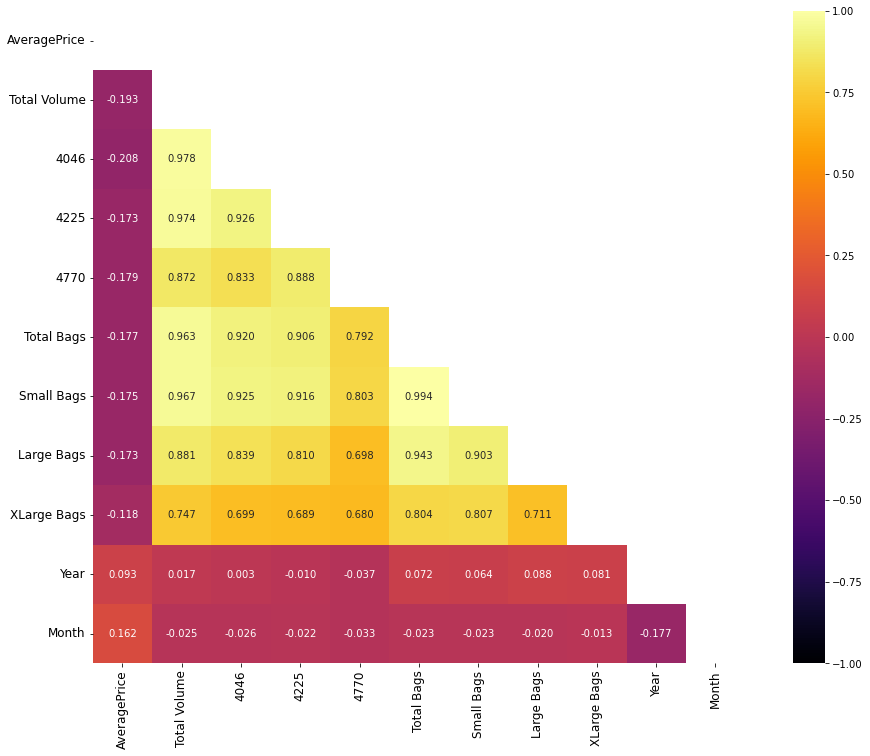

In [41]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(17,12))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="inferno", mask=upper_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

We generated a pairplot for all our features and label column but it has turned out to be very tiny to be visible properly hence we will take help of a heatmap and understand the correlation details.

From the above heatmap we undertand that there is multicolinearity present in our feature columns. There are 2 types of correlation namely Positive correlation when a correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together and Negative correlation when a correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

Here we notice that columns PLU 4046, PLU 4225 and PLU 4770 are all product codes that comprise the Total Volume. Similarly, the columns Small Bags, Large Bags, Extra Large Bags all comprise the Total Bags. Therefore to sort out the multicolinearity concern we can drop the unnecessary columns.

In [42]:
df.drop(["4046", "4225", "4770", "Small Bags", "Large Bags", "XLarge Bags"], axis=1, inplace=True)

I am removing the columns "4046", "4225", "4770", "Small Bags", "Large Bags" and "XLarge Bags" to avoid the multi colinearity concern in our dataset.

In [43]:
df=pd.read_csv('avocado.csv')

In [44]:
# Copy of original dataframe
df3=df.copy()

In [45]:
df3['Year'], df3['Month'], df3['Day'] = df3['Date'].str.split('-').str
df3.drop(columns=['Date','year'], inplace=True)
df3

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Day
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12,27
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12,20
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12,13
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12,06
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,2018,02,04
18245,8,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,2018,01,28
18246,9,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,2018,01,21
18247,10,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,2018,01,14


In [46]:
# Converting Datetime datatypes to int
df3['Year']=df3['Year'].astype(int)
df3['Month']=df3['Month'].astype(int)
df3['Date']=df3['Day'].astype(int)

In [47]:
df3.drop(columns=['Day'],axis=1, inplace=True)

In [48]:
df3.drop(columns=['Date'],axis=1, inplace=True)

In [49]:
df3.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11


In [50]:
# Using Label Encoder on target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df3['region']=le.fit_transform(df3['region'])
df3['type']=le.fit_transform(df3['type'])
df3.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0,2015,12
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0,2015,12
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0,2015,12
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0,2015,12
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0,2015,11


In [51]:
# Checking unique values and Yearwise total No of sale entry
df3['Year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: Year, dtype: int64

<AxesSubplot:xlabel='Year', ylabel='count'>

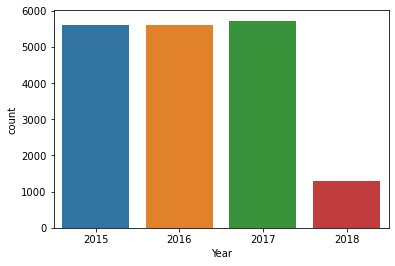

In [52]:
sns.countplot('Year',data=df3)

# Comment:
This dataset contain data from 2015 to 2018
Maximum sales entry belongs to year 2017 while very few sales entry comes from 2018.


# Approach :
* We want check Avg Price over each Month
* First we will check Sale entries per Months
* Next We will Avg Price over each month using Countplot
* Finally we will try to bring insight over relation of sales entries to Avg price over same month.
* Checking Month-Wise sales entries

<AxesSubplot:xlabel='Month', ylabel='count'>

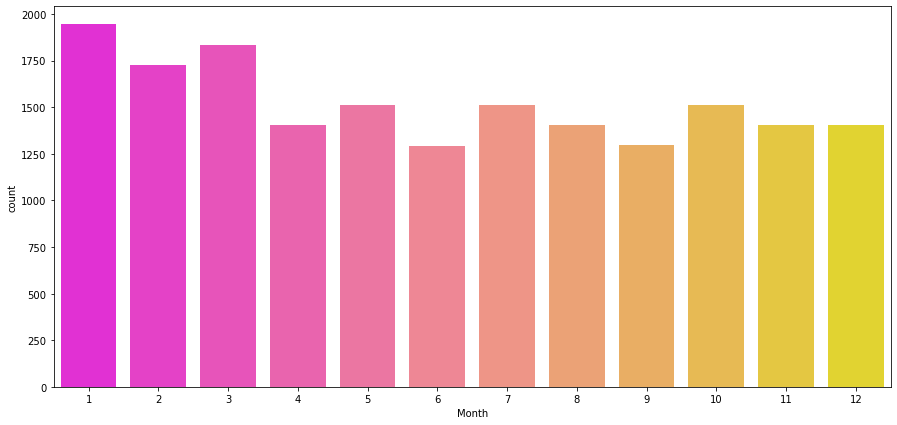

In [53]:
plt.figure(figsize=(15,7))
sns.countplot(x='Month', data=df3, palette="spring")

# Comment:
* Maximum sales lead comes in month of Jan, Feb, March
* Maximum sales demand of Avacodo is in month of Jan (1944 lead) & Minimum sales demand of Avacoda is in month of June

# Checking Month-Wise Variation in Average Price

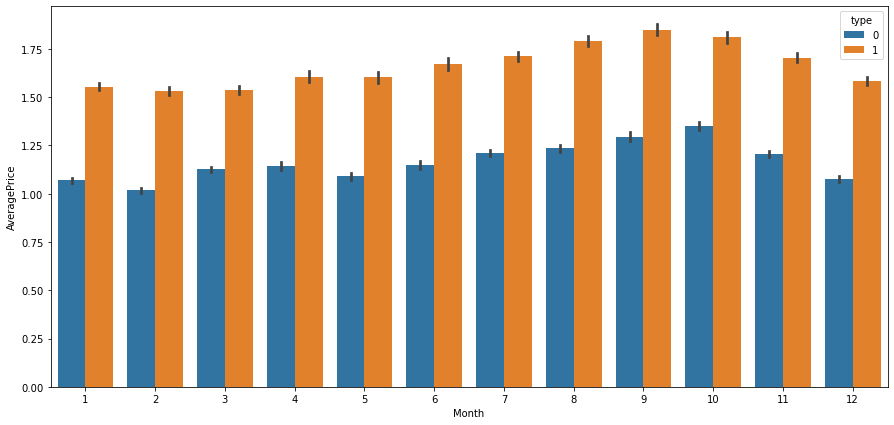

In [54]:
plt.figure(figsize=(15,7))
sns.barplot(x="Month", y="AveragePrice", hue='type', data=df3)
plt.show()

In [55]:
df3.groupby(['Month','type'])['AveragePrice'].agg([np.mean]).T

Month        1                   2                   3                  4   \
type          0         1         0         1         0         1        0   
mean   1.069095  1.552942  1.017315  1.531458  1.126209  1.538301  1.14235   

Month                 5             ...        8                  9   \
type         1         0         1  ...         0        1         0   
mean   1.60641  1.089577  1.603624  ...  1.235399  1.78963  1.294738   

Month                  10                  11                  12            
type          1         0         1         0         1         0         1  
mean   1.850571  1.349339  1.810026  1.206054  1.705071  1.077393  1.585193  

[1 rows x 24 columns]

<Figure size 720x720 with 0 Axes>

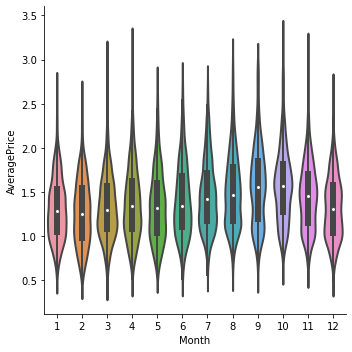

In [56]:
plt.figure(figsize=(10,10))
sns.catplot(x = "Month", y = "AveragePrice", kind ='violin', data=df3, linewidth=2)
plt.show()

# Comment :
* In month of September and October Price of Conventional type of Avacado is comparatively higher than other months.
* There is not much upheaval in Organic type Avacoda over year peroid.
* We can see that variation in mean price values in above groupby table, which confirm what we got from barplot.

# But what causes such High demand in 1st quater of year ?

Simple Google gives answer 'FLAVOR'. Yes, Flavor!!!

Avocados are available year round like most agricultural commodities these days, but January through March is the best time of year for flavor . It is during this time that the fruit has developed higher oil content, resulting in that buttery flavor and texture that we all love. </b>

* Now Let Compare Countplot of Sales Entries and Barplot of Avg Price Monthwise.
* In first sight we can see in period of Augest to October price high & in that same time period sales order are minimum.
* Opposite of it true in duration of Jan to March.
* This variation applicable to conventional type while we cannot find such any relation in case of Organic avacado.

In conclusion when Average sale price of 'Conventional Avacado' is high in same time less sales order are observe. Inshort Customer are less interested in buying avacado at high Price.

# Till Now we have not explore region feature , Now is time do it.

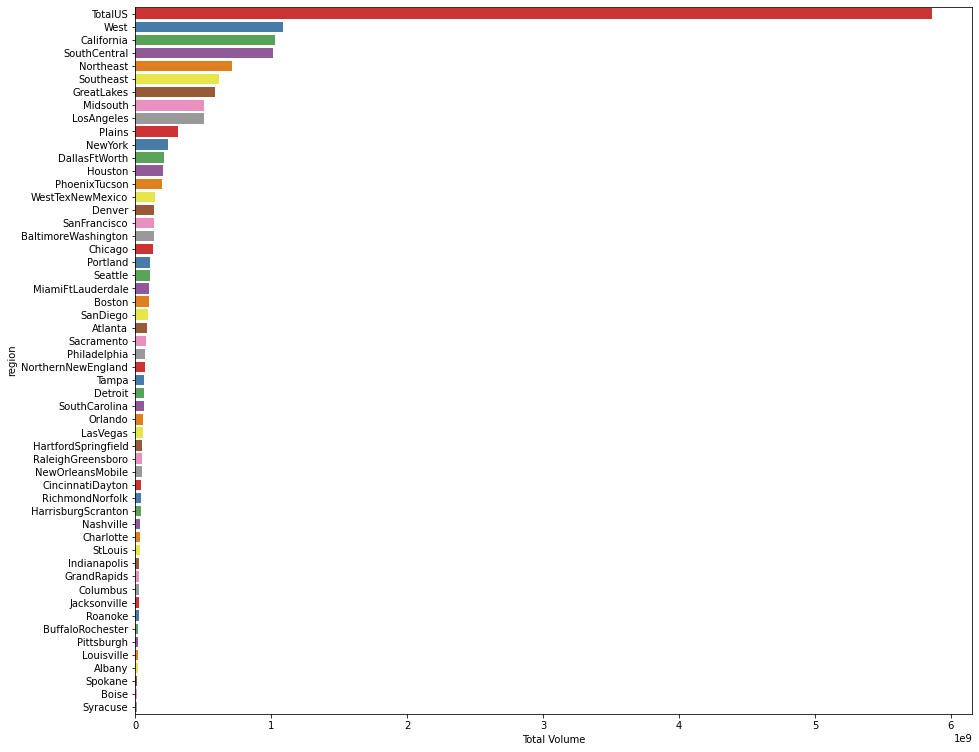

In [57]:
region = df.groupby('region')['Total Volume'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(15,13))
sns.barplot(x=region["Total Volume"], y=region["region"], data=df, palette="Set1")
plt.show()

In [58]:
df.groupby(['region'])['Total Volume','Total Bags','Small Bags','Large Bags','XLarge Bags'].agg([np.mean])

,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags
,mean,mean,mean,mean,mean
region,,,,,
Albany,4.753787e+04,7.929747e+03,6.647765e+03,1.153496e+03,128.488639
Atlanta,2.621453e+05,8.449856e+04,5.160573e+04,3.207004e+04,822.786036
BaltimoreWashington,3.985619e+05,1.044561e+05,1.009397e+05,2.903985e+03,612.382722
Boise,4.264257e+04,1.597459e+04,1.384004e+04,2.103634e+03,30.915207
Boston,2.877929e+05,6.359609e+04,5.890659e+04,4.438365e+03,251.124231
BuffaloRochester,6.793630e+04,3.435134e+04,3.037998e+04,3.729050e+03,242.313432
California,3.044324e+06,7.298290e+05,6.778038e+05,3.642585e+04,15599.342929
Charlotte,1.051939e+05,3.460930e+04,3.149069e+04,2.912684e+03,205.927781


# Comment on feature Region:
* Maximum sales Volume is in South Central While Minimum Sales Volume is in Syracuse.
* Maximum Average Price is in SanFrancisco and Minimum Average Sale price is in Houston.

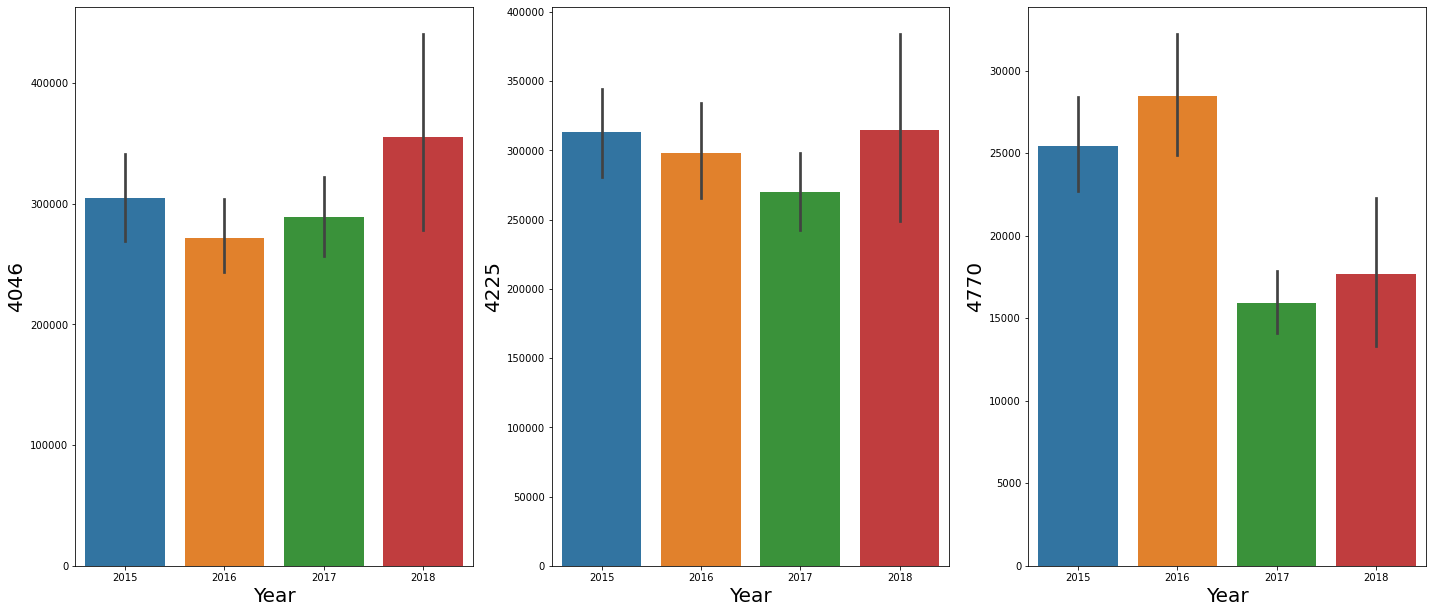

In [59]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
y = df[['4046','4225','4770']]
X = df['year']
for col in y:
    if plotnumber<=9:
        plt.subplot(3,3,plotnumber)
        sns.barplot(X,y[col])
        plt.xlabel('Year',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

 * Production of PLU 4046 has grown over the 4 years and is greater than the production of PLU 4225 and PLU 4770, which is least produced.

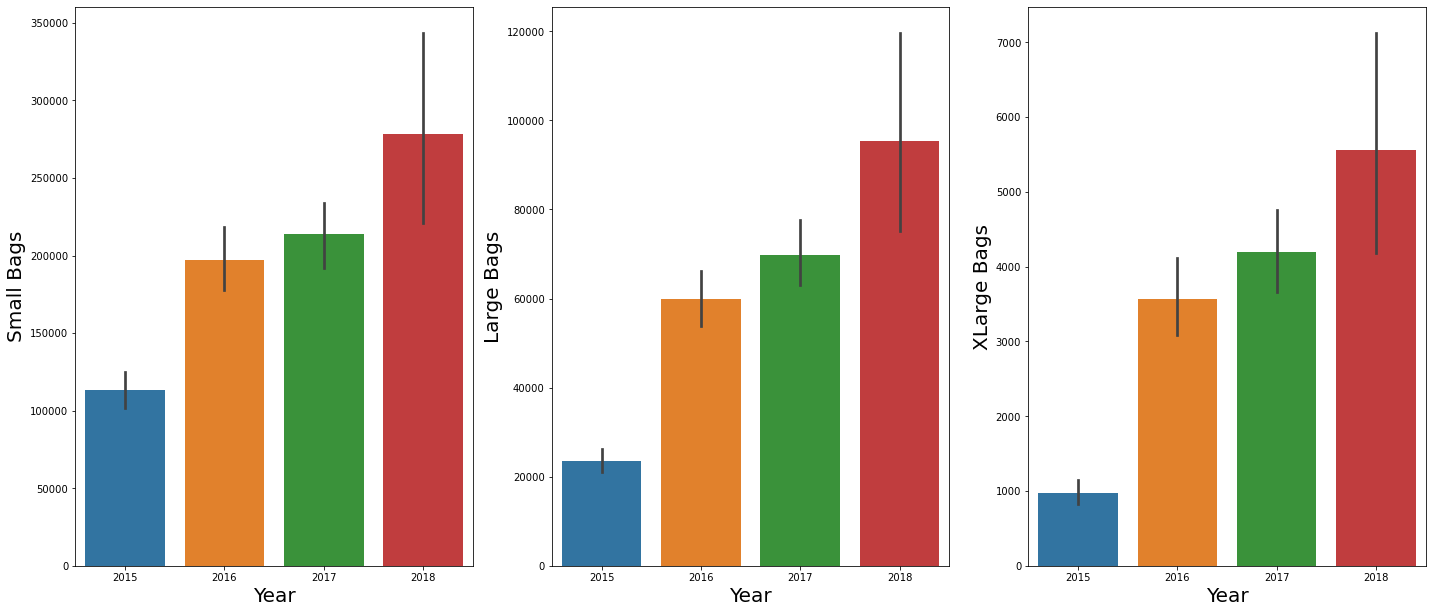

In [60]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
y = df[['Small Bags','Large Bags','XLarge Bags']]
X = df['year']
for col in y:
    if plotnumber<=9:
        plt.subplot(3,3,plotnumber)
        sns.barplot(X,y[col])
        plt.xlabel('Year',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Comment:
* Sale of all 3 types of bags has grown over the years.
* Most of customers prefer buying Small Bags over Large and Xlarge bags.
* There is very narrow Customer segment willing to buy XLarge type bags possiblily more quantity need to consume and price associated with it.

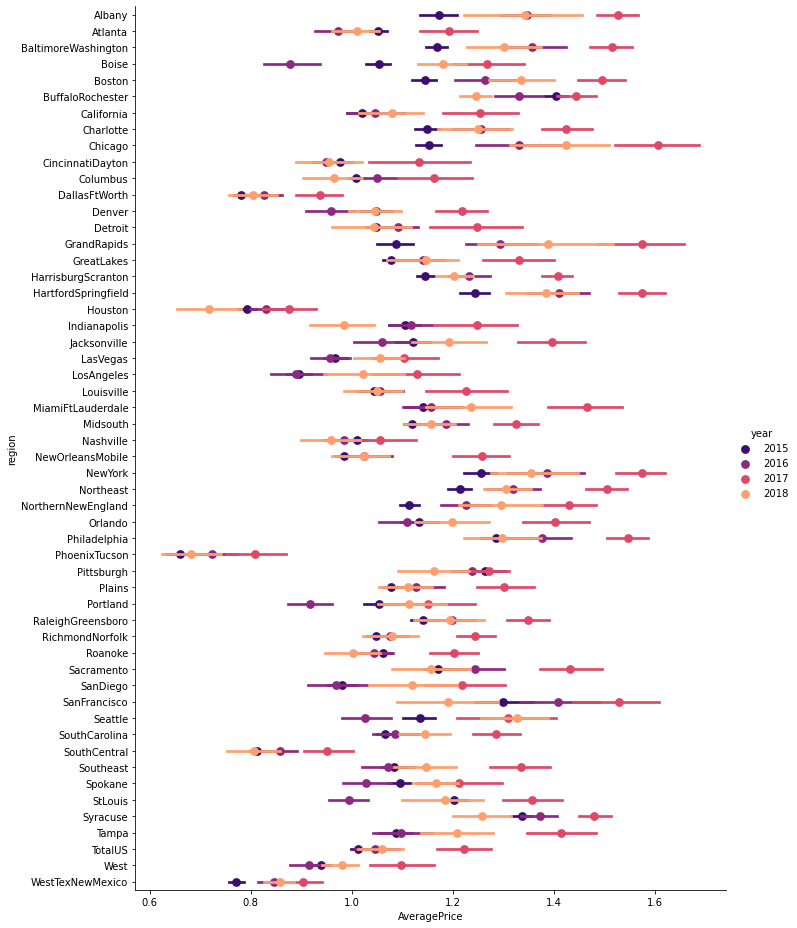

In [61]:
mask = df['type']=='conventional'
g = sns.factorplot('AveragePrice','region',data=df[mask],
                   hue='year',
                   size=13,
                   aspect=0.8,
                   palette='magma',
                   join=False,
              )

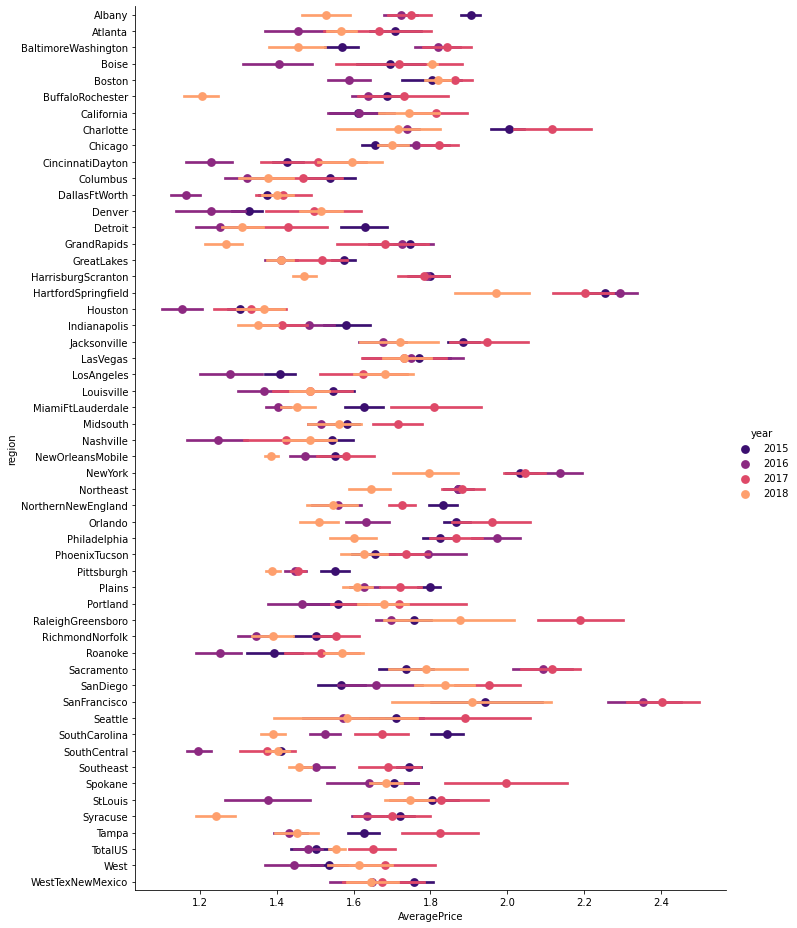

In [62]:
mask = df['type']=='organic'
g = sns.factorplot('AveragePrice','region',data=df[mask],
                   hue='year',
                   size=13,
                   aspect=0.8,
                   palette='magma',
                   join=False,
              )

* The Average price of the avacado is high in the region San Francisco followed by RaleighGreensboro in the year 2017. The demand of the fruit is high and price also high in the year 2017.

In [63]:
df2=df.copy()


In [64]:
# Creating Datframe for numeric features
df2.drop(['Date','type','region','year'], axis=1, inplace=True)



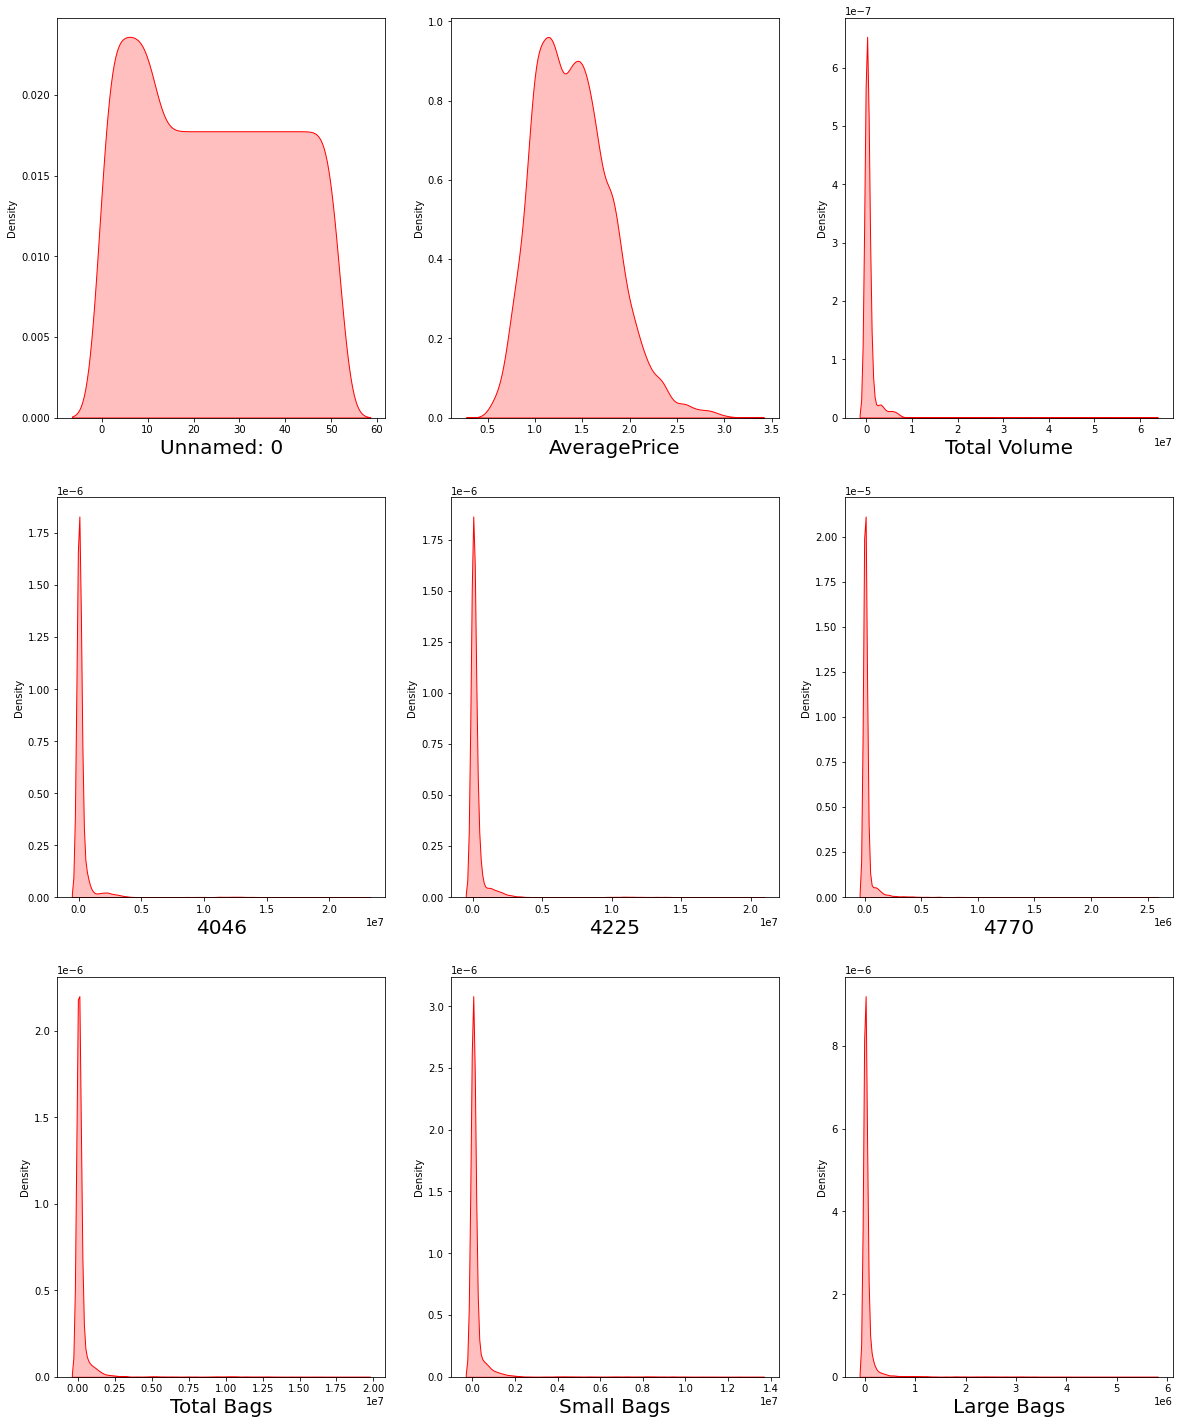

In [65]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber =1
for column in df2:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df2[column], color='r',hist=False,kde_kws={"shade": True})
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Comment :
* We can see skewed data with presence of outliers with sharp peak.
* Most of the plots are right skewed, having value of mean very small compare to std. deviation & median. This is resulting in sharp high peak.Very few data points are present as we move away from zero to other end of x-axis.
* sns.set_palette('gist_rainbow_r')

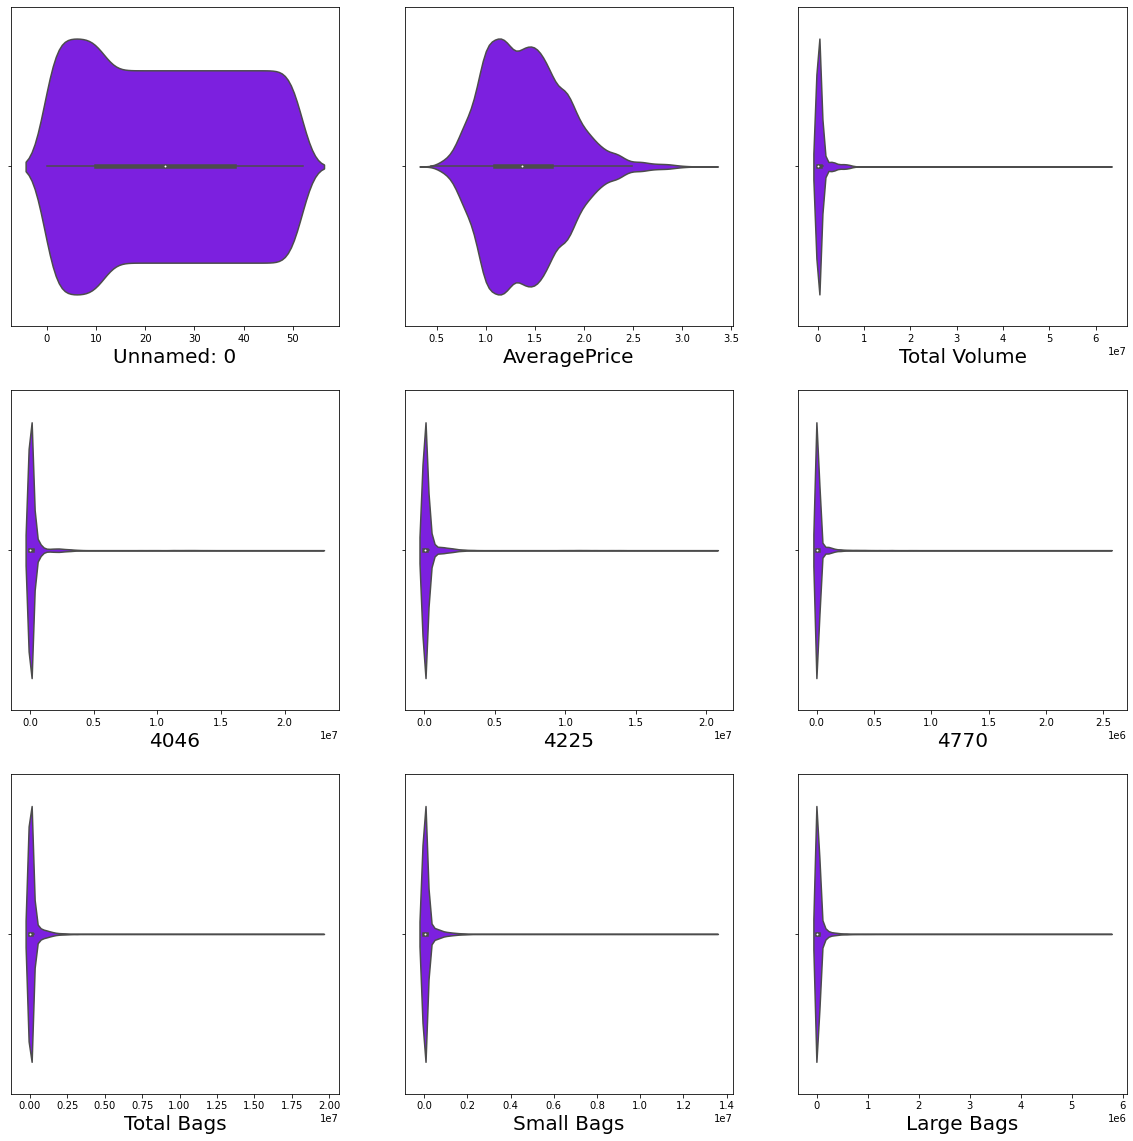

In [66]:
sns.set_palette('gist_rainbow_r')
plt.figure(figsize=(20,20), facecolor='white')
plotnumber =1
for column in df2:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.violinplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Comment :
* For Majority Average price is in range of 1 to 1.5.
* Rest of Violin plot show same story as distribution plot.

# Avacado availability and price also vary over the year according to seasonal changes.Lets check the variation Avg price and sales volume over each month.

For that purpose let create another copy dataframe and then split date column into Year,Month and Day.

# Pairplot

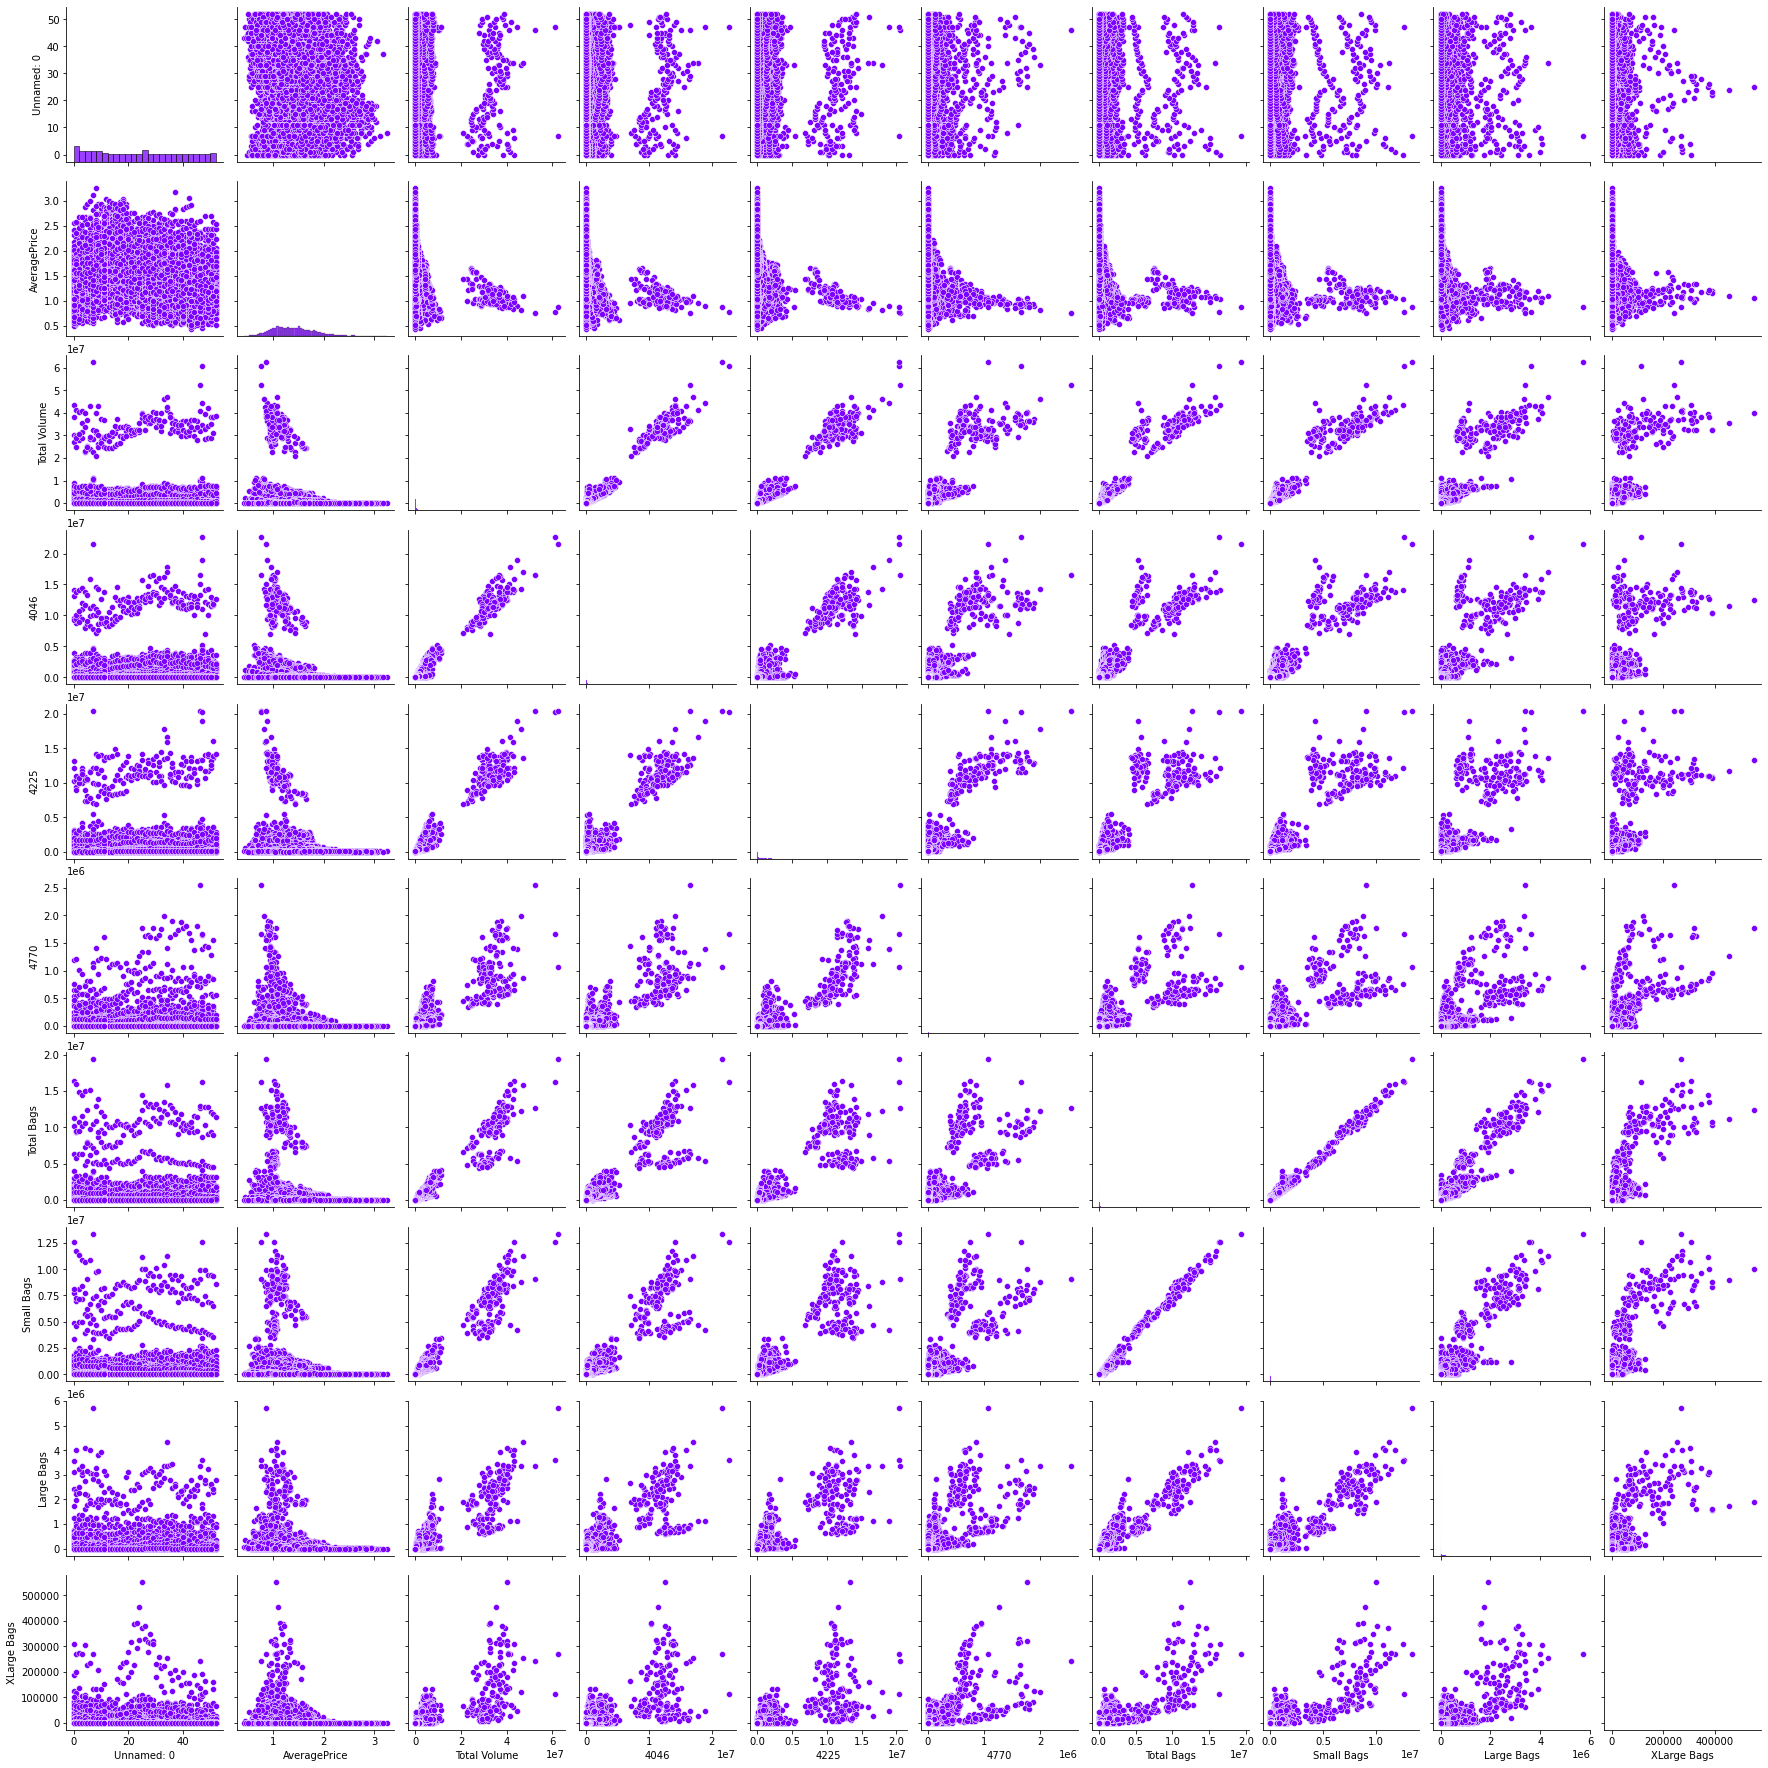

In [67]:
sns.pairplot(df2)

# Encoding categorical data

In [68]:
# Using Label Encoder on target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df3['region']=le.fit_transform(df3['region'])
df3['type']=le.fit_transform(df3['type'])
df3.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0,2015,12
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0,2015,12
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0,2015,12
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0,2015,12
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0,2015,11


# Outliers Detection and Removal

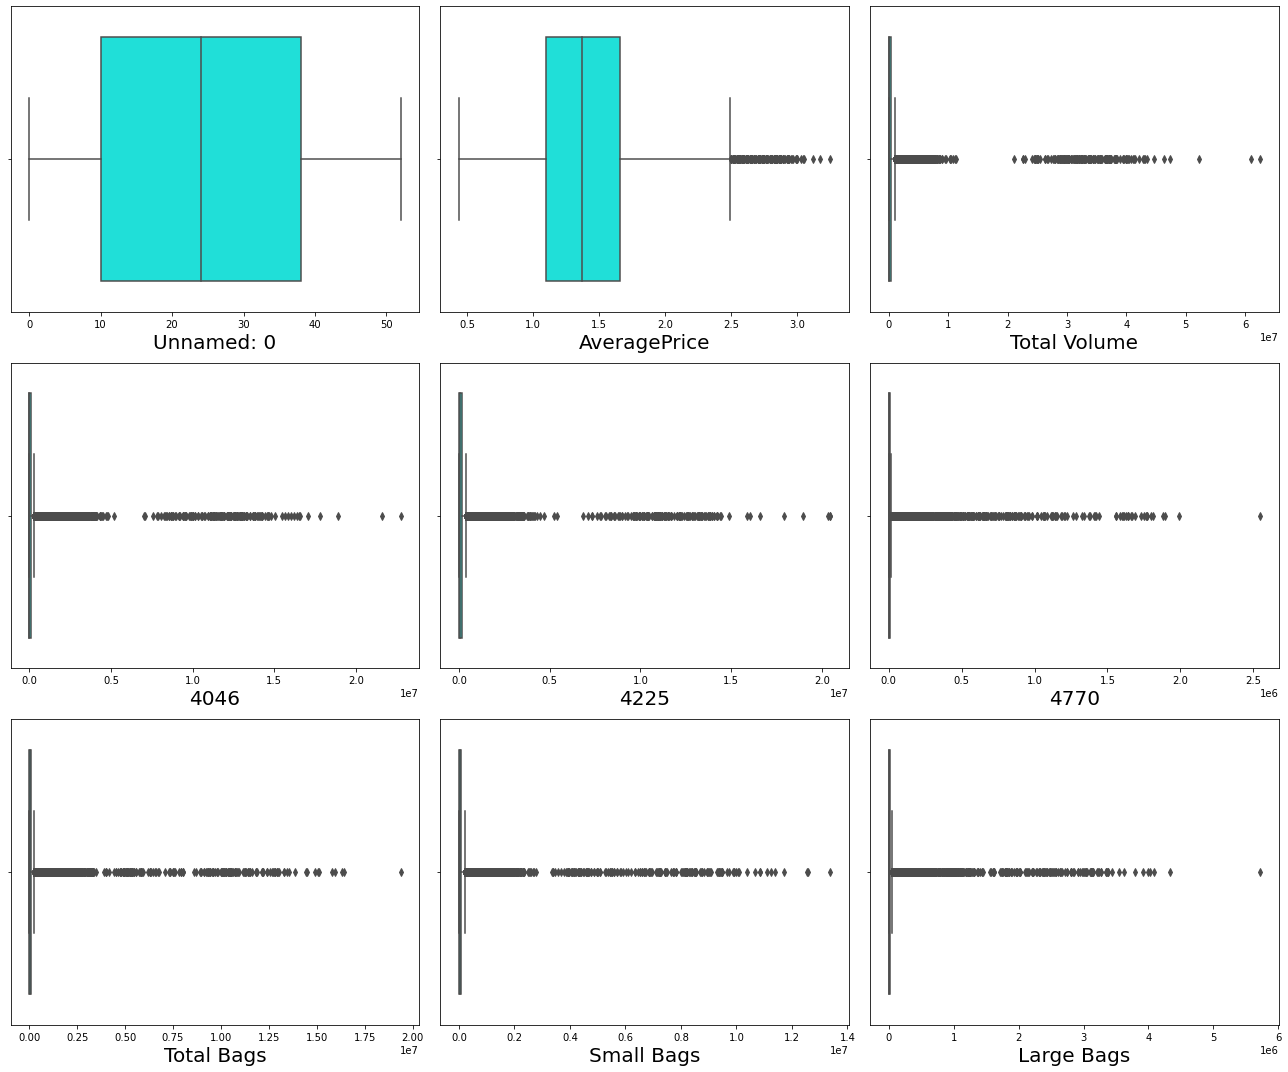

In [69]:
plt.figure(figsize=(18,15), facecolor='white')
plotnumber =1
for column in df2:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df2[column], palette='hsv')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()


In [70]:
from scipy.stats import zscore
z = np.abs(zscore(df3))
threshold = 3
df4 = df3[(z<3).all(axis = 1)]

In [71]:
print("\033[1m"+'Shape of dataset after removing outliers :'+"\033[0m",df4.shape)

Shape of dataset after removing outliers : (17651, 14)


In [72]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((18249-17651)/18249)*100,'%')

Percentage Data Loss : 3.276891884486821 %


# Corrleation

In [73]:
df4.corr()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month
Unnamed: 0,1.000000,-0.126781,0.017336,0.019337,0.029467,0.052711,-0.016020,-0.011083,-0.026140,-0.012751,0.004325,-0.001651,-0.170651,-0.780789
AveragePrice,-0.126781,1.000000,-0.332056,-0.333577,-0.243988,-0.243465,-0.297323,-0.275771,-0.270915,-0.152669,0.613150,-0.003242,0.091704,0.149502
Total Volume,0.017336,-0.332056,1.000000,0.876307,0.871592,0.647518,0.912184,0.905648,0.640642,0.513741,-0.415476,0.076676,-0.004866,-0.018645
4046,0.019337,-0.333577,0.876307,1.000000,0.565118,0.492127,0.727981,0.706800,0.561060,0.415432,-0.341376,0.119067,-0.034636,-0.015797
4225,0.029467,-0.243988,0.871592,0.565118,1.000000,0.620221,0.757786,0.778761,0.451711,0.392030,-0.383138,0.011002,-0.040234,-0.019844
4770,0.052711,-0.243465,0.647518,0.492127,0.620221,1.000000,0.557980,0.571512,0.323747,0.495976,-0.321809,-0.095972,-0.082054,-0.027245
Total Bags,-0.016020,-0.297323,0.912184,0.727981,0.757786,0.557980,1.000000,0.978213,0.746946,0.581690,-0.378205,0.085892,0.103442,-0.010916
Small Bags,-0.011083,-0.275771,0.905648,0.706800,0.778761,0.571512,0.978213,1.000000,0.593155,0.597700,-0.367593,0.065976,0.086639,-0.013018
Large Bags,-0.026140,-0.270915,0.640642,0.561060,0.451711,0.323747,0.746946,0.593155,1.000000,0.296864,-0.286813,0.127635,0.119543,-0.001457
XLarge Bags,-0.012751,-0.152669,0.513741,0.415432,0.392030,0.495976,0.581690,0.597700,0.296864,1.000000,-0.263734,-0.044338,0.108209,0.002843


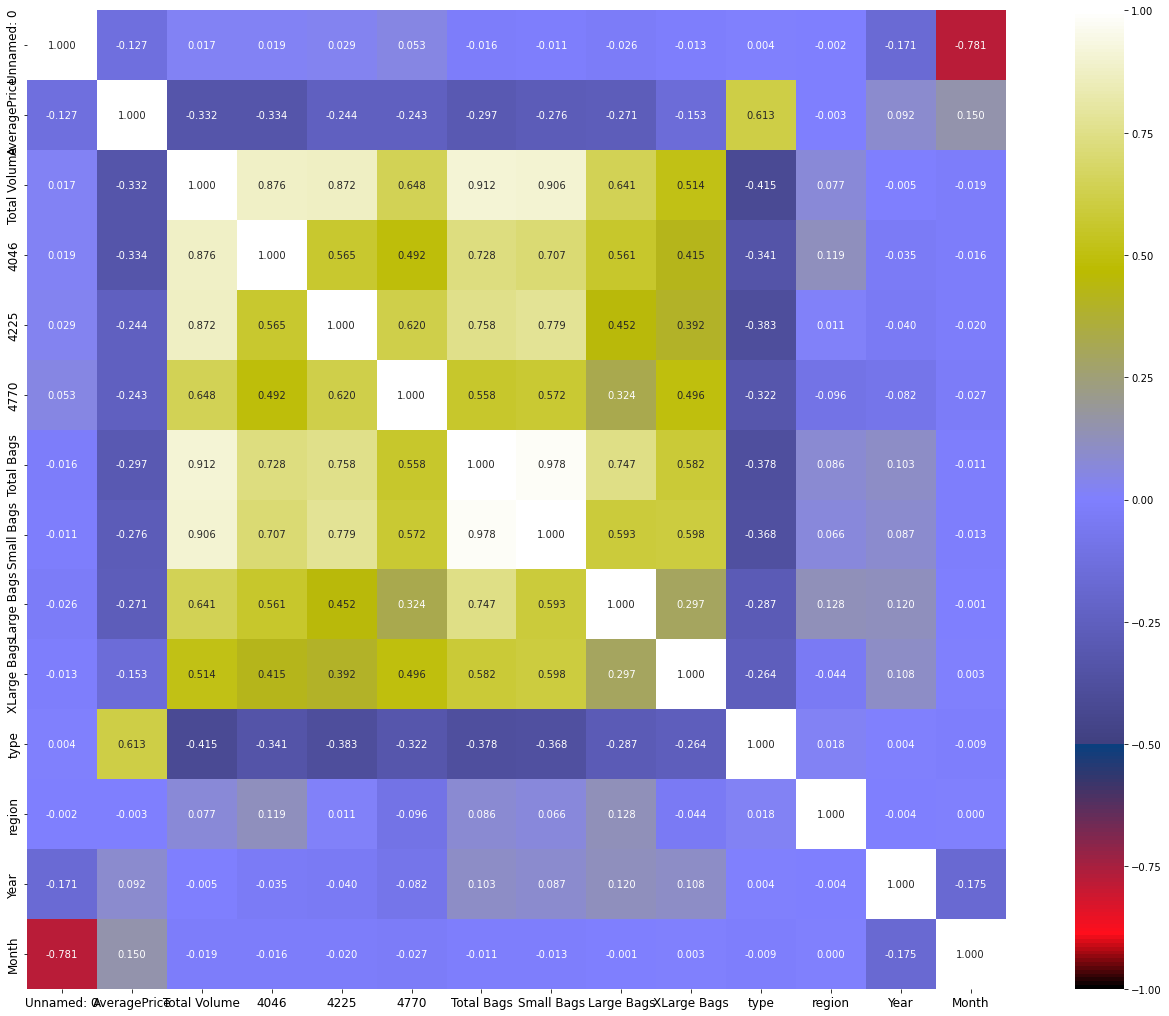

In [74]:
plt.figure(figsize=(25,18))
sns.heatmap(df4.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

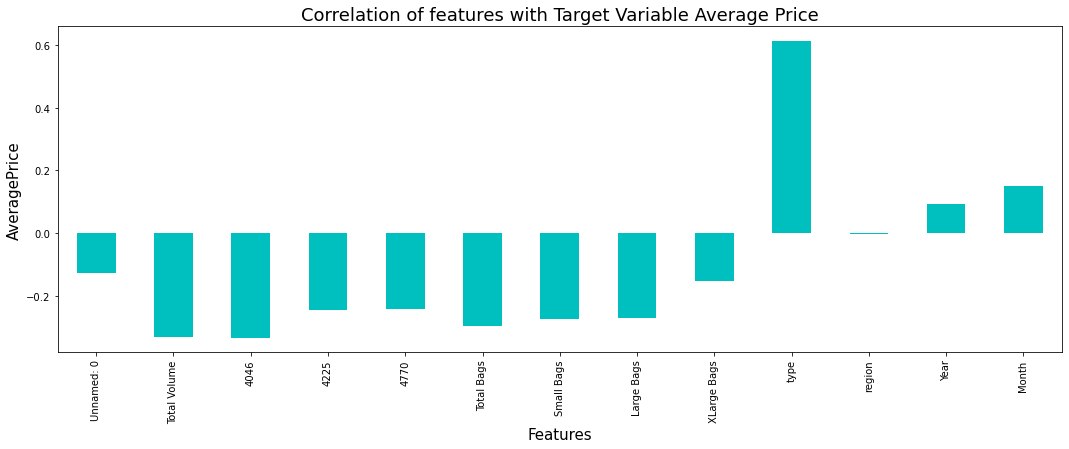

In [75]:
plt.figure(figsize = (18,6))
df4.corr()['AveragePrice'].drop(['AveragePrice']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('AveragePrice',fontsize=15)
plt.title('Correlation of features with Target Variable Average Price',fontsize = 18)
plt.show()

In [76]:
df4.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0,2015,12
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0,2015,12
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0,2015,12
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0,2015,12
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0,2015,11


# Almost all features are highly negatively correlated with the target variable and only type,year,month have positive correlation with the target.

* Small bags are highly correlated with Total Bags correlation coeffient 0.978. It is natural as most of bags are small.
* Total volume is highly correleated 4046.

# Comment:
We are going to remove some of columns which are not reqire for further analysis

* 4046,4225,4770 are shows multicollinearity with Total Volume. These feature are nothing but Total avacado sold under particular grade, which are already counted in Total Volume. As we do not have any price data according each grade of avacado. These feature doesnot have any meaning in ML model.So gone drop them.
* Same goes with Total bags. Total bags is sum of all other type of bags. We gone keep drop Total bags and going to keep other differnt size bags counts features.
* Next is region feature, we also going drop this as it very poorly correlated with other features.

In [77]:
df4.drop(columns=['4046','4225','4770','region','Total Bags'],axis=1, inplace=True)

# Checking Multicollinearity between features using variance_inflation_factor

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df4.values,i) for i in range(df4.shape[1])]
vif['Features']= df4.columns
vif

,VIF,Features
0,8.915814,Unnamed: 0
1,24.373378,AveragePrice
2,7.822771,Total Volume
3,7.761301,Small Bags
4,1.977068,Large Bags
5,1.693554,XLarge Bags
6,3.643827,type
7,42.665915,Year
8,10.536329,Month


# Strategy to Address Multicollinearity :
1 - Removing Some of highly correlated features. But this will not work here as most of input features are correlated with each other either moderated or poorly.
2 - Another way to address Multicollinerity is to Scaled Data and then apply PCA.

# We will go by first way for further investigation. As For Independent feature VIF is within limit of 10 except year.

We will drop Year as it is less than 20% correlated with target feature and For most of input features correlated with less than 10%.

In [79]:
df4.drop(columns=['Year'],axis=1, inplace=True)

# Checking correlation with target variable after removal of multicollinearity

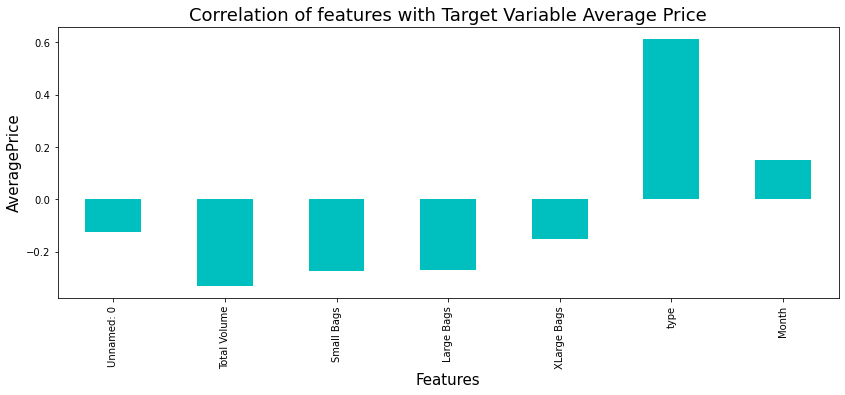

In [80]:
plt.figure(figsize = (14,5))
df4.corr()['AveragePrice'].drop(['AveragePrice']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('AveragePrice',fontsize=15)
plt.title('Correlation of features with Target Variable Average Price',fontsize = 18)
plt.show()

# Skewness of features

In [81]:
df4.skew()

Unnamed: 0      0.106116
AveragePrice    0.377432
Total Volume    3.767138
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
Month           0.107408
dtype: float64

# Transforming skewness through log transform

In [82]:
for col in df4.columns:
    if df4.skew().loc[col]>0.55:
        df4[col]=np.log1p(df4[col])

# Standard Scaling

In [83]:
X = df4.drop('AveragePrice', axis=1)
Y = df4['AveragePrice']

In [84]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

# Machine Learning Model Building

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=42, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

NameError: name 'X_scale' is not defined

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.4704180723999827 on Random_state 557


# Linear Regression : Base model

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=557, test_size=.33)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',Y_test)

Predicted Wins:
 [1.11560566 1.23256895 1.59885549 ... 1.7058977  1.63993579 1.63377677]


Actual Wins:
 8841     1.35
859      1.19
17369    2.09
11190    1.05
14051    2.03
         ... 
5452     1.05
3489     1.35
14534    1.22
11925    1.71
11077    1.83
Name: AveragePrice, Length: 5825, dtype: float64


# Linear Regression Evaluation Matrix

In [89]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 0.22365558400921245
Mean squared error : 0.08075836592231764
Root Mean Squared Error: 0.28418016454762923


 R2 Score :
0.4704180723999827


In [90]:
# Cross Validation
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X_scale, Y, cv =5)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : LinearRegression() :

Mean CV Score : -0.013272543317445363


# Applying other Regression Model, Evaluation & Crossvalidation

In [91]:
rf = RandomForestRegressor(n_estimators = 70 ,max_depth=25)
dtc = DecisionTreeRegressor()
adb=AdaBoostRegressor(learning_rate=0.1)
gradb=GradientBoostingRegressor(max_depth=25,learning_rate=0.1)
rd=Ridge(alpha=0.01)

model = [rf,rd,dtc,adb,gradb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    print('==============================================================================================================')




 Error of  RandomForestRegressor(max_depth=25, n_estimators=70) :
Mean absolute error : 0.15954065712997373
Mean squared error : 0.046665527064433
Root Mean Squared Error: 0.2160220522641913


 R2 Score :
0.6939856386021341


 Error of  Ridge(alpha=0.01) :
Mean absolute error : 0.22365559221601222
Mean squared error : 0.08075837129331112
Root Mean Squared Error: 0.28418017399760864


 R2 Score :
0.47041803717909814


 Error of  DecisionTreeRegressor() :
Mean absolute error : 0.2084463519313305
Mean squared error : 0.09272848068669527
Root Mean Squared Error: 0.3045135147849686


 R2 Score :
0.3919227192794127


 Error of  AdaBoostRegressor(learning_rate=0.1) :
Mean absolute error : 0.21954552066457675
Mean squared error : 0.07611492363001066
Root Mean Squared Error: 0.27588933221494927


 R2 Score :
0.5008679594398566


 Error of  GradientBoostingRegressor(max_depth=25) :
Mean absolute error : 0.20034428653198674
Mean squared error : 0.08522269836405745
Root Mean Squared Error: 0.291

Among all Model Random Forest Regressor gave us maximum R2 score of 0.6945171 and minimum RMSE value of 0.21583. So We will perform Hyper Parameter Tuning on Random Forest Regressor.

# Hyper Parameter Tuning : GridSearchCV

In [3]:
from sklearn.model_selection import GridSearchCV

In [4]:
from sklearn.ensemble import RandomForestRegressor

In [5]:
parameter = {'n_estimators':[30,60,80],'max_depth': [10,20,40],
             'min_samples_leaf':[5,10],'criterion':['mse','mae'],
             'max_features':["auto","sqrt","log2"]}

In [6]:
GCV = GridSearchCV(RandomForestRegressor(),parameter,cv=5,n_jobs = -1,verbose = 3)

In [7]:
GCV.fit(X_train,Y_train)

NameError: name 'X_train' is not defined

I waited for almost hour for 2-3 times, but I did not get any output of Grid search CV. This May be due to computational Limitation. So I am going forward with Final Model by Manual defining parameter.

# Final Model


In [1]:
from sklearn.ensemble import RandomForestRegressor
Final_mod =  RandomForestRegressor(n_estimators=60 ,criterion = 'mse', max_depth= 20, max_features = 'auto',
             min_samples_leaf = 5, min_samples_split = 10)
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')

NameError: name 'X_train' is not defined

In [ ]:
plt.figure(figsize=(12,7))
y_pred=Final_mod.predict(X_test)
sns.swarmplot(Y_test.round(2), y_pred)
print('\033[1m'+' True Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('True Values' , fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()

# Saving model


In [ ]:
import joblib
joblib.dump(Final_mod,'Avacado_Final.pkl')

# conclusion
Among all Model Random Forest Regressor gave us maximum R2 score of 0.6945171 and minimum RMSE value of 0.21583. So We will perform Hyper Parameter Tuning on Random Forest Regressor.